In [19]:
import spacy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [20]:
nlp = spacy.load('en_core_web_sm')

doc = nlp("The 22-year-old recently won ATP Challenger tournament.")

for tok in doc:
    print(tok.text, "...", tok.dep_)

The ... det
22 ... nummod
- ... punct
year ... npadvmod
- ... punct
old ... nsubj
recently ... advmod
won ... ROOT
ATP ... compound
Challenger ... compound
tournament ... dobj
. ... punct


In [21]:
import re
import pandas as pd
import bs4
import requests
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [52]:
import nltk

In [53]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shrestha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
t = "I do not like green eggs and ham. I do not like them Sam-I-am."
a_list = nltk.tokenize.sent_tokenize(t) 
print(a_list)

['I do not like green eggs and ham.', 'I do not like them Sam-I-am.']


In [63]:
file1 = open('Grand_corpus1.txt', 'r')
Lines = file1.readlines()
 
count = 0
# Strips the newline character
txt=[]
for line in Lines:
    count += 1
    txt.append(line.strip())
    print("Line{}: {}".format(count, line.strip()))

Line1: pain chest Causes hypertensive disease.
Line2: shortness of breath Causes hypertensive disease.
Line3: dizziness Causes hypertensive disease.
Line4: asthenia Causes hypertensive disease.
Line5: fall Causes hypertensive disease.
Line6: syncope Causes hypertensive disease.
Line7: vertigo Causes hypertensive disease.
Line8: sweating increased Causes hypertensive disease.
Line9: palpitation Causes hypertensive disease.
Line10: nausea Causes hypertensive disease.
Line11: angina pectoris Causes hypertensive disease.
Line12: pressure chest Causes hypertensive disease.
Line13: polyuria Causes diabetes.
Line14: polydypsia Causes diabetes.
Line15: shortness of breath Causes diabetes.
Line16: pain chest Causes diabetes.
Line17: asthenia Causes diabetes.
Line18: nausea Causes diabetes.
Line19: orthopnea Causes diabetes.
Line20: rale Causes diabetes.
Line21: sweating increased Causes diabetes.
Line22: unresponsiveness Causes diabetes.
Line23: mental status changes Causes diabetes.
Line24: ve

Line1239: superimposition Causes lymphoma.
Line1240: haemoptysis Causes lymphoma.
Line1241: tired Causes lymphoma.
Line1242: polydypsia Causes lymphoma.
Line1243: difficulty passing urine Causes lymphoma.
Line1244: sore to touch Causes hyperglycemia.
Line1245: pruritus Causes hyperglycemia.
Line1246: feeling strange Causes hyperglycemia.
Line1247: pustule Causes hyperglycemia.
Line1248: cushingoid habitus Causes hyperglycemia.
Line1249: decreased body weight Causes hyperglycemia.
Line1250: mood depressed Causes hyperglycemia.
Line1251: estrogen use Causes hyperglycemia.
Line1252: wheezing Causes hyperglycemia.
Line1253: ascites Causes hyperglycemia.
Line1254: seizure Causes hyperglycemia.
Line1255: uncoordination Causes encephalopathy.
Line1256: asterixis Causes encephalopathy.
Line1257: haemorrhage Causes encephalopathy.
Line1258: sleepy Causes encephalopathy.
Line1259: absences finding Causes encephalopathy.
Line1260: posturing Causes encephalopathy.
Line1261: aura Causes encephalopa

In [64]:
txt

['pain chest Causes hypertensive disease.',
 'shortness of breath Causes hypertensive disease.',
 'dizziness Causes hypertensive disease.',
 'asthenia Causes hypertensive disease.',
 'fall Causes hypertensive disease.',
 'syncope Causes hypertensive disease.',
 'vertigo Causes hypertensive disease.',
 'sweating increased Causes hypertensive disease.',
 'palpitation Causes hypertensive disease.',
 'nausea Causes hypertensive disease.',
 'angina pectoris Causes hypertensive disease.',
 'pressure chest Causes hypertensive disease.',
 'polyuria Causes diabetes.',
 'polydypsia Causes diabetes.',
 'shortness of breath Causes diabetes.',
 'pain chest Causes diabetes.',
 'asthenia Causes diabetes.',
 'nausea Causes diabetes.',
 'orthopnea Causes diabetes.',
 'rale Causes diabetes.',
 'sweating increased Causes diabetes.',
 'unresponsiveness Causes diabetes.',
 'mental status changes Causes diabetes.',
 'vertigo Causes diabetes.',
 'vomiting Causes diabetes.',
 'labored breathing Causes diabete

In [67]:
df = pd.DataFrame(txt)
df

,0
0,pain chest Causes hypertensive disease.
1,shortness of breath Causes hypertensive disease.
2,dizziness Causes hypertensive disease.
3,asthenia Causes hypertensive disease.
4,fall Causes hypertensive disease.
...,...
1863,systolic murmur Causes decubitus ulcer.
1864,frail Causes decubitus ulcer.
1865,fever Causes decubitus ulcer.
1866,fever Causes decubitus ulcer.


In [65]:
for i in txt:
    nlp1 = nlp(i)
    print(nlp1)

pain chest Causes hypertensive disease.
shortness of breath Causes hypertensive disease.
dizziness Causes hypertensive disease.
asthenia Causes hypertensive disease.
fall Causes hypertensive disease.
syncope Causes hypertensive disease.
vertigo Causes hypertensive disease.
sweating increased Causes hypertensive disease.
palpitation Causes hypertensive disease.
nausea Causes hypertensive disease.
angina pectoris Causes hypertensive disease.
pressure chest Causes hypertensive disease.
polyuria Causes diabetes.
polydypsia Causes diabetes.
shortness of breath Causes diabetes.
pain chest Causes diabetes.
asthenia Causes diabetes.
nausea Causes diabetes.
orthopnea Causes diabetes.
rale Causes diabetes.
sweating increased Causes diabetes.
unresponsiveness Causes diabetes.
mental status changes Causes diabetes.
vertigo Causes diabetes.
vomiting Causes diabetes.
labored breathing Causes diabetes.
feeling suicidal Causes depressive disorder.
suicidal Causes depressive disorder.
hallucinations au

enuresis Causes confusion.
lethargy Causes confusion.
speech slurred Causes confusion.
fall Causes confusion.
consciousness clear Causes confusion.
mental status changes Causes confusion.
asterixis Causes confusion.
unconscious state Causes confusion.
agitation Causes confusion.
muscle twitch Causes confusion.
asthenia Causes confusion.
sleepy Causes confusion.
dizziness Causes confusion.
headache Causes confusion.
dysarthria Causes confusion.
lightheadedness Causes confusion.
tremor Causes confusion.
hyponatremia Causes confusion.
unresponsiveness Causes confusion.
pain Causes degenerative polyarthritis.
food intolerance Causes degenerative polyarthritis.
numbness of hand Causes degenerative polyarthritis.
general discomfort Causes degenerative polyarthritis.
drowsiness Causes degenerative polyarthritis.
asthenia Causes degenerative polyarthritis.
nonsmoker Causes degenerative polyarthritis.
non-productive cough Causes degenerative polyarthritis.
polydypsia Causes degenerative polyart

pain chest Causes cardiomyopathy.
syncope Causes cardiomyopathy.
yellow sputum Causes cardiomyopathy.
rale Causes cardiomyopathy.
dyspnea Causes cardiomyopathy.
dyspnea on exertion Causes cardiomyopathy.
left atrial hypertrophy Causes cardiomyopathy.
fatigue Causes cardiomyopathy.
weight gain Causes cardiomyopathy.
patient non compliance Causes cardiomyopathy.
vomiting Causes chronic kidney failure.
orthopnea Causes chronic kidney failure.
hyperkalemia Causes chronic kidney failure.
oliguria Causes chronic kidney failure.
jugular venous distention Causes chronic kidney failure.
nausea Causes chronic kidney failure.
shortness of breath Causes chronic kidney failure.
mental status changes Causes chronic kidney failure.
diarrhea Causes chronic kidney failure.
asthenia Causes chronic kidney failure.
chest tightness Causes chronic kidney failure.
malaise Causes chronic kidney failure.
chill Causes chronic kidney failure.
rale Causes chronic kidney failure.
fever Causes chronic kidney failur

vomiting Causes mitral valve insufficiency.
pain Causes mitral valve insufficiency.
cardiomegaly Causes mitral valve insufficiency.
chest discomfort Causes mitral valve insufficiency.
pain Causes arthritis.
hemodynamically stable Causes arthritis.
sleeplessness Causes arthritis.
asthenia Causes arthritis.
syncope Causes arthritis.
swelling Causes arthritis.
atypia Causes arthritis.
general unsteadiness Causes arthritis.
shortness of breath Causes arthritis.
distended abdomen Causes arthritis.
cough Causes bronchitis.
wheezing Causes bronchitis.
shortness of breath Causes bronchitis.
chest tightness Causes bronchitis.
fever Causes bronchitis.
throat sore Causes bronchitis.
productive cough Causes bronchitis.
hepatosplenomegaly Causes bronchitis.
night sweat Causes bronchitis.
haemoptysis Causes bronchitis.
labored breathing Causes bronchitis.
snuffle Causes bronchitis.
hacking cough Causes bronchitis.
dyspnea Causes bronchitis.
chill Causes bronchitis.
stridor Causes bronchitis.
decreas

difficulty Causes carcinoma breast.
lesion Causes carcinoma breast.
estrogen use Causes carcinoma breast.
burning sensation Causes carcinoma breast.
dyspnea Causes carcinoma breast.
swelling Causes carcinoma breast.
formication Causes carcinoma breast.
hallucinations auditory Causes schizophrenia.
hypersomnolence Causes schizophrenia.
irritable mood Causes schizophrenia.
verbal auditory hallucinations Causes schizophrenia.
patient non compliance Causes schizophrenia.
agitation Causes schizophrenia.
suicidal Causes schizophrenia.
worry Causes schizophrenia.
hallucinations visual Causes schizophrenia.
underweight Causes schizophrenia.
homelessness Causes schizophrenia.
pain abdominal Causes diverticulitis.
abscess bacterial Causes diverticulitis.
dullness Causes diverticulitis.
red blotches Causes diverticulitis.
diarrhea Causes diverticulitis.
sore to touch Causes diverticulitis.
dysuria Causes diverticulitis.
pain Causes diverticulitis.
vomiting Causes diverticulitis.
sinus rhythm Caus

unresponsiveness Causes pneumonia aspiration.
extreme exhaustion Causes pneumonia aspiration.
stupor Causes pneumonia aspiration.
seizure Causes pneumonia aspiration.
transaminitis Causes pneumonia aspiration.
hemiplegia Causes pneumonia aspiration.
cough Causes pneumonia aspiration.
gurgle Causes pneumonia aspiration.
pain Causes pneumonia aspiration.
diarrhea Causes pneumonia aspiration.
pain abdominal Causes pneumonia aspiration.
fever Causes colitis.
thicken Causes colitis.
green sputum Causes colitis.
vomiting Causes colitis.
nausea and vomiting Causes colitis.
awakening early Causes colitis.
pain Causes colitis.
nausea Causes colitis.
chill Causes colitis.
tenesmus Causes colitis.
urge incontinence Causes colitis.
pain abdominal Causes colitis.
hemodynamically stable Causes colitis.
fecaluria Causes diverticulosis.
constipation Causes diverticulosis.
abscess bacterial Causes diverticulosis.
heme positive Causes diverticulosis.
lightheadedness Causes diverticulosis.
diarrhea Cause

mass of body structure Causes neoplasm metastasis.
atypia Causes neoplasm metastasis.
lesion Causes carcinoma colon.
prostatism Causes carcinoma colon.
constipation Causes carcinoma colon.
general discomfort Causes carcinoma colon.
diarrhea Causes carcinoma colon.
pain abdominal Causes carcinoma colon.
urinary hesitation Causes carcinoma colon.
dizzy spells Causes carcinoma colon.
shooting pain Causes carcinoma colon.
bradycardia Causes carcinoma colon.
vomiting Causes carcinoma colon.
systolic ejection murmur Causes carcinoma colon.
nausea Causes carcinoma colon.
hyperemesis Causes carcinoma colon.
polydypsia Causes carcinoma colon.
polyuria Causes ketoacidosis diabetic.
vomiting Causes ketoacidosis diabetic.
nausea Causes ketoacidosis diabetic.
pain abdominal Causes ketoacidosis diabetic.
milky Causes ketoacidosis diabetic.
feeling strange Causes ketoacidosis diabetic.
gurgle Causes ketoacidosis diabetic.
nervousness Causes ketoacidosis diabetic.
abdominal tenderness Causes ketoacido

hemiplegia Causes spasm bronchial.
fremitus Causes spasm bronchial.
clonus Causes aphasia.
egophony Causes aphasia.
facial paresis Causes aphasia.
aphagia Causes aphasia.
muscle twitch Causes aphasia.
paralyse Causes aphasia.
low back pain Causes aphasia.
charleyhorse Causes aphasia.
out of breath Causes obesity morbid.
sedentary Causes obesity morbid.
angina pectoris Causes obesity morbid.
cough Causes obesity morbid.
unhappy Causes obesity morbid.
labored breathing Causes obesity morbid.
hypothermia, natural Causes obesity morbid.
dyspnea Causes obesity morbid.
hematocrit decreased Causes obesity morbid.
wheezing Causes obesity morbid.
hypoxemia Causes obesity morbid.
renal angle tenderness Causes obesity morbid.
feels hot/feverish Causes obesity morbid.
fever Causes pyelonephritis.
pain Causes pyelonephritis.
urgency of micturition Causes pyelonephritis.
hematuria Causes pyelonephritis.
vomiting Causes pyelonephritis.
chill Causes pyelonephritis.
diarrhea Causes pyelonephritis.
naus

diarrhea Causes ileus.
mass of body structure Causes ileus.
apyrexial Causes ileus.
constipation Causes ileus.
thicken Causes ileus.
gravida 0 Causes ileus.
pain abdominal Causes ileus.
flatulence Causes adhesion.
pain Causes adhesion.
large-for-dates fetus Causes adhesion.
para 1 Causes adhesion.
vomiting Causes adhesion.
lung nodule Causes adhesion.
breech presentation Causes adhesion.
shortness of breath Causes adhesion.
decreased body weight Causes adhesion.
immobile Causes adhesion.
unsteady gait Causes adhesion.
hallucinations visual Causes adhesion.
feeling suicidal Causes adhesion.
loose associations Causes delusion.
giddy mood Causes delusion.
feeling hopeless Causes delusion.
agitation Causes delusion.
hallucinations auditory Causes delusion.
irritable mood Causes delusion.
sleeplessness Causes delusion.
neologism Causes delusion.
homicidal thoughts Causes delusion.
disturbed family Causes delusion.
worry Causes delusion.
decompensation Causes delusion.
verbally abusive behav

In [66]:
def get_entities(sent):
    ## chunk 1
    ent1 = ""
    ent2 = ""

    prv_tok_dep = ""  # dependency tag of previous token in the sentence
    prv_tok_text = ""  # previous token in the sentence

    prefix = ""
    modifier = ""

    #############################################################

    for tok in nlp(sent):
        ## chunk 2
        # if token is a punctuation mark then move on to the next token
        if tok.dep_ != "punct":
            # check: token is a compound word or not
            if tok.dep_ == "compound":
                prefix = tok.text
                # if the previous word was also a 'compound' then add the current word to it
                if prv_tok_dep == "compound":
                    prefix = prv_tok_text + " " + tok.text

            # check: token is a modifier or not
            if tok.dep_.endswith("mod") == True:
                modifier = tok.text
                # if the previous word was also a 'compound' then add the current word to it
                if prv_tok_dep == "compound":
                    modifier = prv_tok_text + " " + tok.text

            ## chunk 3
            if tok.dep_.find("subj") == True:
                ent1 = modifier + " " + prefix + " " + tok.text
                prefix = ""
                modifier = ""
                prv_tok_dep = ""
                prv_tok_text = ""

                ## chunk 4
            if tok.dep_.find("obj") == True:
                ent2 = modifier + " " + prefix + " " + tok.text

            ## chunk 5  
            # update variables
            prv_tok_dep = tok.dep_
            prv_tok_text = tok.text
    #############################################################

    return [ent1.strip(), ent2.strip()]

In [69]:
entity_pairs = []

for i in tqdm(df[0]):
    entity_pairs.append(get_entities(i))

100%|██████████████████████████████████████████████████████████████████████████████| 1868/1868 [00:22<00:00, 83.80it/s]


In [14]:
entity_pairs = []

for i in tqdm(df[0]):
    entity_pairs.append(get_entities(i))

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 179.01it/s]


In [71]:
def get_relation(sent):

    doc = nlp(sent)

    # Matcher class object 
    matcher = Matcher(nlp.vocab)

    #define the pattern 
    pattern = [{'DEP':'ROOT'},
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

    matcher.add("matching_1", [pattern]) 

    matches = matcher(doc)
    k = len(matches) - 1

    span = doc[matches[k][1]:matches[k][2]] 

    return(span.text)

In [72]:
get_relation("hemophilia is caused by a genetic mutation")

'caused by'

In [73]:
relations = [get_relation(i) for i in tqdm(df[0])]


 36%|████████████████████████████                                                   | 664/1868 [00:07<00:14, 84.75it/s]


 71%|███████████████████████████████████████████████████████▋                      | 1335/1868 [00:15<00:05, 92.16it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 1868/1868 [00:23<00:00, 78.55it/s]


In [81]:
kg_df = pd.DataFrame({'source':df['symptom'], 'target':df['disease'], 'edge':relations})
kg_df

,source,target,edge
0,pain chest,hypertensive disease,Causes
1,shortness of breath,hypertensive disease,Causes
2,dizziness,hypertensive disease,Causes
3,asthenia,hypertensive disease,Causes
4,fall,hypertensive disease,Causes
...,...,...,...
1862,prostatism,affect labile,Causes
1863,systolic murmur,decubitus ulcer,Causes
1864,frail,decubitus ulcer,Causes
1865,fever,decubitus ulcer,Causes


In [82]:

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

  0%|                                                                                         | 0/1868 [08:25<?, ?it/s]


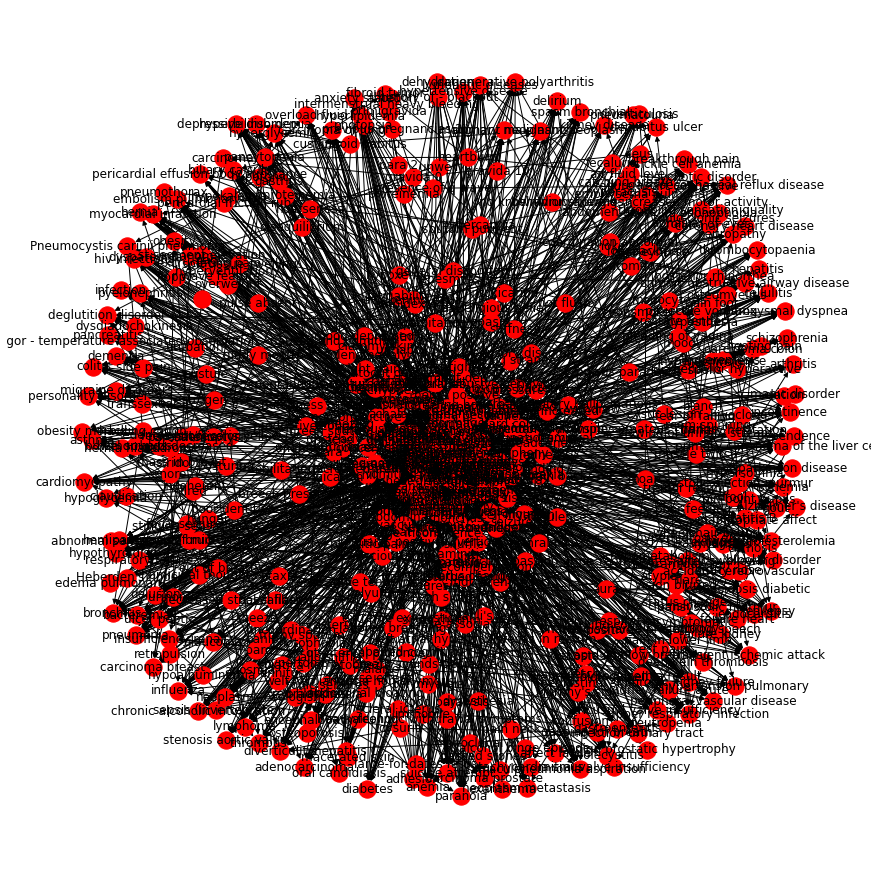

In [83]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [84]:
kg_df1 = kg_df[kg_df['target']=='hypertensive disease']
kg_df1

,source,target,edge
0,pain chest,hypertensive disease,Causes
1,shortness of breath,hypertensive disease,Causes
2,dizziness,hypertensive disease,Causes
3,asthenia,hypertensive disease,Causes
4,fall,hypertensive disease,Causes
5,syncope,hypertensive disease,Causes
6,vertigo,hypertensive disease,Causes
7,sweating increased,hypertensive disease,Causes
8,palpitation,hypertensive disease,Causes
9,nausea,hypertensive disease,Causes


In [85]:
G=nx.from_pandas_edgelist(kg_df1, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

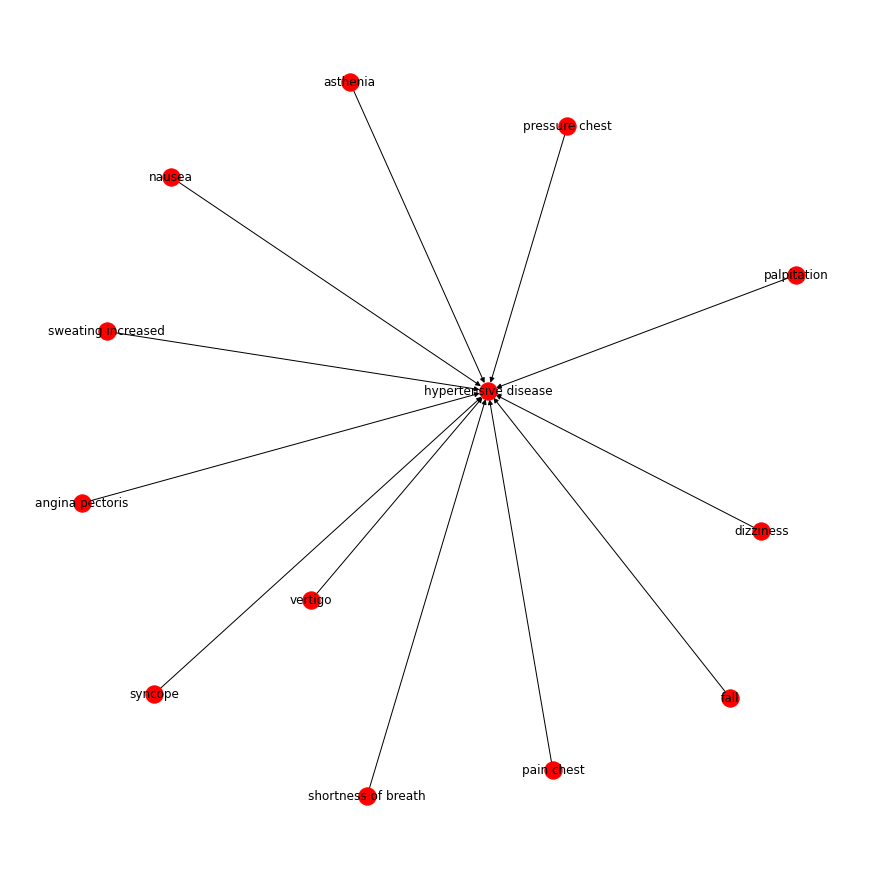

In [86]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [89]:
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

In [87]:
links = kg_df.to_dict('records')
links

[{'source': 'pain chest', 'target': 'hypertensive disease', 'edge': 'Causes'},
 {'source': 'shortness of breath',
  'target': 'hypertensive disease',
  'edge': 'Causes'},
 {'source': 'dizziness', 'target': 'hypertensive disease', 'edge': 'Causes'},
 {'source': 'asthenia', 'target': 'hypertensive disease', 'edge': 'Causes'},
 {'source': 'fall', 'target': 'hypertensive disease', 'edge': 'Causes'},
 {'source': 'syncope', 'target': 'hypertensive disease', 'edge': 'Causes'},
 {'source': 'vertigo', 'target': 'hypertensive disease', 'edge': 'Causes'},
 {'source': 'sweating increased',
  'target': 'hypertensive disease',
  'edge': 'Causes'},
 {'source': 'palpitation', 'target': 'hypertensive disease', 'edge': 'Causes'},
 {'source': 'nausea', 'target': 'hypertensive disease', 'edge': 'Causes'},
 {'source': 'angina pectoris',
  'target': 'hypertensive disease',
  'edge': 'Causes'},
 {'source': 'pressure chest',
  'target': 'hypertensive disease',
  'edge': 'Causes'},
 {'source': 'polyuria', 'tar

In [90]:
nodes=[]
for i in G:
    dict1 = {}
    dict1["id"] = i
    nodes.append(dict1)
nodes

[{'id': 'pain chest'},
 {'id': 'hypertensive disease'},
 {'id': 'shortness of breath'},
 {'id': 'dizziness'},
 {'id': 'asthenia'},
 {'id': 'fall'},
 {'id': 'syncope'},
 {'id': 'vertigo'},
 {'id': 'sweating increased'},
 {'id': 'palpitation'},
 {'id': 'nausea'},
 {'id': 'angina pectoris'},
 {'id': 'pressure chest'},
 {'id': 'polyuria'},
 {'id': 'diabetes'},
 {'id': 'polydypsia'},
 {'id': 'orthopnea'},
 {'id': 'rale'},
 {'id': 'unresponsiveness'},
 {'id': 'mental status changes'},
 {'id': 'vomiting'},
 {'id': 'labored breathing'},
 {'id': 'feeling suicidal'},
 {'id': 'depressive disorder'},
 {'id': 'suicidal'},
 {'id': 'hallucinations auditory'},
 {'id': 'feeling hopeless'},
 {'id': 'weepiness'},
 {'id': 'sleeplessness'},
 {'id': 'motor retardation'},
 {'id': 'irritable mood'},
 {'id': 'blackout'},
 {'id': 'mood depressed'},
 {'id': 'hallucinations visual'},
 {'id': 'worry'},
 {'id': 'agitation'},
 {'id': 'tremor'},
 {'id': 'intoxication'},
 {'id': 'verbal auditory hallucinations'},
 {'i

In [91]:
Graph_api={}
Graph_api["nodes"]=nodes
Graph_api["links"]=links
Graph_api

{'nodes': [{'id': 'pain chest'},
  {'id': 'hypertensive disease'},
  {'id': 'shortness of breath'},
  {'id': 'dizziness'},
  {'id': 'asthenia'},
  {'id': 'fall'},
  {'id': 'syncope'},
  {'id': 'vertigo'},
  {'id': 'sweating increased'},
  {'id': 'palpitation'},
  {'id': 'nausea'},
  {'id': 'angina pectoris'},
  {'id': 'pressure chest'},
  {'id': 'polyuria'},
  {'id': 'diabetes'},
  {'id': 'polydypsia'},
  {'id': 'orthopnea'},
  {'id': 'rale'},
  {'id': 'unresponsiveness'},
  {'id': 'mental status changes'},
  {'id': 'vomiting'},
  {'id': 'labored breathing'},
  {'id': 'feeling suicidal'},
  {'id': 'depressive disorder'},
  {'id': 'suicidal'},
  {'id': 'hallucinations auditory'},
  {'id': 'feeling hopeless'},
  {'id': 'weepiness'},
  {'id': 'sleeplessness'},
  {'id': 'motor retardation'},
  {'id': 'irritable mood'},
  {'id': 'blackout'},
  {'id': 'mood depressed'},
  {'id': 'hallucinations visual'},
  {'id': 'worry'},
  {'id': 'agitation'},
  {'id': 'tremor'},
  {'id': 'intoxication'},


In [92]:
import json 
     
with open("sample_KG.json", "w") as outfile: 
    json.dump(Graph_api, outfile)

In [16]:
s = 'pain chest causes hypertensive disease'

In [17]:
get_entities(s)

['pain chest', 'hypertensive  disease']

In [94]:
list(kg_df['target'].unique())

['hypertensive disease',
 'diabetes',
 'depressive disorder',
 'coronary heart disease',
 'pneumonia',
 'failure heart congestive',
 'accident\xa0cerebrovascular',
 'asthma',
 'myocardial infarction',
 'hypercholesterolemia',
 'infection',
 'infection urinary tract',
 'anemia',
 'chronic obstructive airway disease',
 'dementia',
 'insufficiency renal',
 'confusion',
 'degenerative\xa0polyarthritis',
 'hypothyroidism',
 'anxiety state',
 'primary malignant neoplasm',
 'hiv infections',
 'cellulitis',
 'gastroesophageal reflux disease',
 'sepsis (invertebrate)',
 'deep vein thrombosis',
 'dehydration',
 'neoplasm',
 'embolism pulmonary',
 'epilepsy',
 'cardiomyopathy',
 'chronic kidney failure',
 'carcinoma',
 'hepatitis C',
 'peripheral vascular disease',
 'psychotic disorder',
 'hyperlipidemia',
 'bipolar disorder',
 'obesity',
 'ischemia',
 'cirrhosis',
 'exanthema',
 'benign prostatic hypertrophy',
 'kidney failure acute',
 'mitral valve insufficiency',
 'arthritis',
 'bronchitis',
 

# Modeling